For a more basic notebook about transfer learning go to the notebook before this (Transfer learning Cats vs Dogs)


[folllowing this](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l06c03_exercise_flowers_with_transfer_learning_solution.ipynb#scrollTo=5wB030nezBwI)

NOTE I am not shuffling my any of my data batches, but if I want to I can use this

```
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
```


In [0]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [2]:
splits = ["train[:70%]", "train[70%:]"]
(training_set, validation_set), dataset_info = tfds.load("tf_flowers", split=splits, with_info=True, as_supervised=True)
dataset_info


tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.0,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

In [3]:
num_classes = dataset_info.features['label'].num_classes


num_training_examples=0

for i in training_set:
  num_training_examples +=1

num_validation_examples = 0
for i in validation_set:
  num_validation_examples  += 1

print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 5
Total Number of Training Images: 2569
Total Number of Validation Images: 1101 



In [4]:
# how 5 training samples look before any editing
for i, example in enumerate(training_set.take(5)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


In [0]:
# Editing the images and creating an input pipe 
# https://www.tensorflow.org/guide/data#basic_mechanics
# https://www.tensorflow.org/guide/data_performance

IMAGE_RES = 224
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)


In [6]:
# how our data looks after resize, normalization and batching

for i, example in enumerate(train_batches.take(5)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (32, 224, 224, 3) label: [2 3 3 4 3 0 0 0 0 1 3 2 4 1 2 1 1 2 3 3 3 0 3 2 1 1 1 3 4 2 2 3]
Image 2 shape: (32, 224, 224, 3) label: [2 4 2 2 0 0 0 2 0 3 0 1 1 1 2 1 3 4 4 0 0 2 3 2 2 3 4 4 1 4 2 2]
Image 3 shape: (32, 224, 224, 3) label: [0 0 1 1 0 3 0 4 4 3 0 4 3 3 2 4 4 0 2 2 1 3 2 0 3 4 3 4 1 4 2 3]
Image 4 shape: (32, 224, 224, 3) label: [0 1 2 1 3 0 1 4 1 0 2 3 0 0 4 0 4 4 1 0 3 0 4 0 3 1 4 2 2 2 1 2]
Image 5 shape: (32, 224, 224, 3) label: [1 1 0 1 2 4 3 3 0 3 2 2 1 0 3 2 4 2 0 3 4 3 3 1 3 4 2 2 0 0 1 3]


In [0]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
EPOCHS = 6
feature_extractor = hub.KerasLayer(URL, input_shape = (IMAGE_RES, IMAGE_RES, 3))
feature_extractor.trainable = False

model = tf.keras.models.Sequential([
                                    feature_extractor,
                                    layers.Dense(num_classes)
])

# I set from_logits = True because I didnt add a softmax to the last dense layer 
model.compile(optimizer = "adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])



In [8]:
history = model.fit(train_batches, validation_data=validation_batches, epochs=EPOCHS)

Epoch 1/6
81/81 [==============================] - 7s 81ms/step - loss: 0.7639 - accuracy: 0.7162 - val_loss: 0.4594 - val_accuracy: 0.8492
Epoch 2/6
81/81 [==============================] - 6s 75ms/step - loss: 0.3754 - accuracy: 0.8735 - val_loss: 0.3724 - val_accuracy: 0.8756
Epoch 3/6
81/81 [==============================] - 6s 75ms/step - loss: 0.2936 - accuracy: 0.9011 - val_loss: 0.3396 - val_accuracy: 0.8883
Epoch 4/6
81/81 [==============================] - 6s 75ms/step - loss: 0.2451 - accuracy: 0.9295 - val_loss: 0.3218 - val_accuracy: 0.8974
Epoch 5/6
81/81 [==============================] - 6s 75ms/step - loss: 0.2108 - accuracy: 0.9436 - val_loss: 0.3109 - val_accuracy: 0.9001
Epoch 6/6
81/81 [==============================] - 6s 74ms/step - loss: 0.1847 - accuracy: 0.9548 - val_loss: 0.3040 - val_accuracy: 0.9019


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

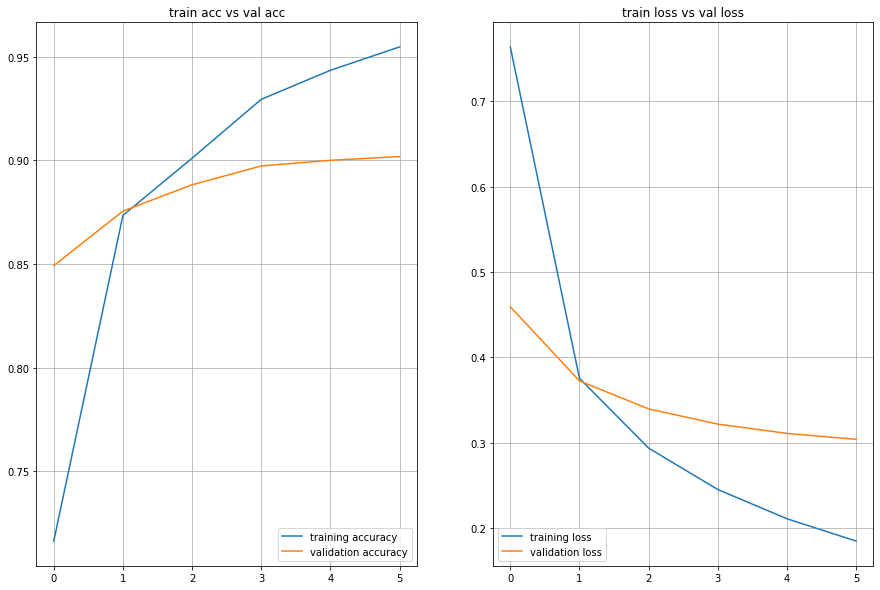

In [10]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(EPOCHS)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))

ax1.plot(epoch_range, train_acc, label="training accuracy")
ax1.plot(epoch_range, val_acc, label="validation accuracy")
ax1.set_title("train acc vs val acc")
ax1.legend(loc='lower right')
ax1.grid()

ax2.plot(epoch_range, train_loss, label="training loss")
ax2.plot(epoch_range, val_loss, label="validation loss")
ax2.set_title("train loss vs val loss")
ax2.legend(loc='lower left')
ax2.grid()

In [11]:
# make a couple of predictions now
class_names = np.array(dataset_info.features['label'].names)
print("class names are {} \n".format(class_names))

data_iterator = iter(train_batches)
# a signle batch 
img_batch, label_batch = next(data_iterator)

prediction_batch = model.predict(img_batch)
print("The shape of the prediction_batch {} ".format(prediction_batch.shape))
# prediction_batch = tf.squeeze(prediction_batch).numpy()
# print("Current shape of the prediction_batch AFTER tf.squeeze {} \n".format(prediction_batch.shape))
print("This shape (32, 5 ) means that we have a list of 32 elements, and each of those 32 elems is a list of 5, which is the prob of each image being a flower type \n")

# axis -1 means that I want the last elem in the shape, ie in (32, 5) I want the max of the inner most list which is made of 5 elements
predicted_idx = np.argmax(prediction_batch, axis=-1)
my_predictions = class_names[predicted_idx]

print("My predictions for that input batch are: \n {}".format(my_predictions))

class names are ['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses'] 

The shape of the prediction_batch (32, 5) 
This shape (32, 5 ) means that we have a list of 32 elements, and each of those 32 elems is a list of 5, which is the prob of each image being a flower type 

My predictions for that input batch are: 
 ['tulips' 'sunflowers' 'sunflowers' 'roses' 'sunflowers' 'dandelion'
 'dandelion' 'dandelion' 'dandelion' 'daisy' 'sunflowers' 'tulips' 'roses'
 'daisy' 'tulips' 'daisy' 'daisy' 'tulips' 'sunflowers' 'sunflowers'
 'sunflowers' 'dandelion' 'sunflowers' 'tulips' 'daisy' 'daisy' 'daisy'
 'sunflowers' 'roses' 'tulips' 'tulips' 'sunflowers']


Labels:            tf.Tensor([2 3 3 4 3 0 0 0 0 1 3 2 4 1 2 1 1 2 3 3 3 0 3 2 1 1 1 3 4 2 2 3], shape=(32,), dtype=int64)
Predicted labels:  [2 3 3 4 3 0 0 0 0 1 3 2 4 1 2 1 1 2 3 3 3 0 3 2 1 1 1 3 4 2 2 3]




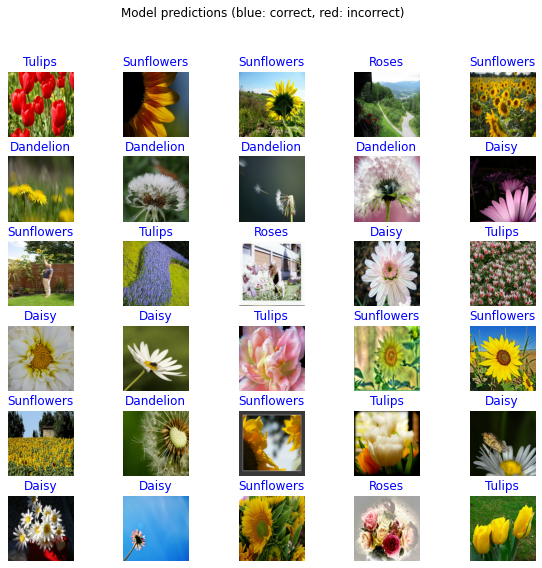

In [12]:
# Compare my predictions to the actual labels

print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_idx)
print("\n")

plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(img_batch[n])
  color = "blue" if predicted_idx[n] == label_batch[n] else "red"
  plt.title(my_predictions[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")



In [13]:
# now using the inception feature extractor 

IMAGE_RES = 299

(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:70%]', 'train[70%:]'],
)
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)

model_inception = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(num_classes)
])

model_inception.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________
